In [83]:
import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag
from nltk import word_tokenize
import re

In [84]:
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [85]:
# A dataset collected from Kaggle (collection of Tweets)
df = pd.read_csv('C:/Users/Spriha/OneDrive/Desktop/FinalBalancedDataset.csv')
df = df[['Toxicity','Tweet']]

In [86]:
df.head()

,Toxicity,Tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [87]:
len(df['Tweet'])

56745

In [88]:
df['Tweet'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [89]:
# Preprocess the text data
for i in range(len(df['Tweet'])):
    df['Tweet'][i] = df['Tweet'][i].lower()
    df['Tweet'][i] = df['Tweet'][i].strip()
    df['Tweet'][i] = re.sub(r'\W', ' ', df['Tweet'][i])
    df['Tweet'][i] = re.sub(r'\s+', ' ', df['Tweet'][i])

In [90]:
l = list(range(0, df.shape[0]))
np.random.shuffle(l)

In [91]:
dataset = df.loc[l[:10000],:]

In [92]:
#Tokenise the text data

tokenized_data = []
for each in dataset['Tweet']:
    tokenized_data.append(word_tokenize(each))

In [93]:
tokenized_data[0]

['goodonedean',
 'metoo',
 'lol',
 'trumpism',
 'is',
 'putinism',
 'donaldtrump',
 'is',
 'a',
 'traitor',
 'committed',
 'treason',
 'â']

In [94]:
# Removing stopwords and stemming !!

from nltk.corpus import stopwords
sw = stopwords.words('english')

from nltk.stem import SnowballStemmer
sb = SnowballStemmer('english')

stemmed_data =[]
for each in tokenized_data:
    ind_list_stemmed =[]
    for each_word in each:
        if each_word not in sw:
            ind_list_stemmed.append(sb.stem(each_word))
    stemmed_data.append(ind_list_stemmed)


In [95]:
stemmed_strings = []
for each in stemmed_data:
    stemmed_strings.append(' '.join(each))

In [96]:
'''#Lemmatization

def get_pos_tag(word_net_tag):
    if word_net_tag[0] == 'J':
        pos_tag = 'a'
    elif word_net_tag[0] == 'V':
        pos_tag = 'v'
    elif word_net_tag[0] == 'R':
        pos_tag = 'r'
    else:
        pos_tag ='n'
    return pos_tag


from nltk import WordNetLemmatizer
lm = WordNetLemmatizer()

lemmatized_data =[]
for each in tokenized_data:
    ind_list_lemmatized =[]
    for each_word in each:
        if each_word not in sw:
            ind_list_lemmatized.append(lm.lemmatize(each_word, get_pos_tag(pos_tag([each_word])[0][1])))
    lemmatized_data.append(ind_list_lemmatized)'''

"#Lemmatization\n\ndef get_pos_tag(word_net_tag):\n    if word_net_tag[0] == 'J':\n        pos_tag = 'a'\n    elif word_net_tag[0] == 'V':\n        pos_tag = 'v'\n    elif word_net_tag[0] == 'R':\n        pos_tag = 'r'\n    else:\n        pos_tag ='n'\n    return pos_tag\n\n\nfrom nltk import WordNetLemmatizer\nlm = WordNetLemmatizer()\n\nlemmatized_data =[]\nfor each in tokenized_data:\n    ind_list_lemmatized =[]\n    for each_word in each:\n        if each_word not in sw:\n            ind_list_lemmatized.append(lm.lemmatize(each_word, get_pos_tag(pos_tag([each_word])[0][1])))\n    lemmatized_data.append(ind_list_lemmatized)"

In [97]:
'''lemmatized_strings = []
for each in lemmatized_data:
    lemmatized_strings.append(' '.join(each))'''

"lemmatized_strings = []\nfor each in lemmatized_data:\n    lemmatized_strings.append(' '.join(each))"

In [98]:
# Applying TF-IDF to stemmed words

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(stemmed_strings).todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
tfidf.vocabulary_

{'goodonedean': 6763,
 'metoo': 10302,
 'lol': 9621,
 'trumpism': 16261,
 'putin': 12763,
 'donaldtrump': 4825,
 'traitor': 16117,
 'commit': 3794,
 'treason': 16160,
 'user': 16638,
 'time': 15886,
 'get': 6536,
 'freelanc': 6205,
 'hat': 7208,
 'novel': 11338,
 'write': 17623,
 'later': 9224,
 'writer': 17624,
 'woke': 17513,
 'amp': 1363,
 'boy': 2682,
 'got': 6797,
 'right': 13322,
 'kad': 8765,
 'raya': 12973,
 'still': 14940,
 'relev': 13140,
 'regardless': 13105,
 'advanc': 1047,
 'technolog': 15496,
 'kan': 8778,
 'tri': 16190,
 'find': 5874,
 'music': 10790,
 'one': 11594,
 'takda': 15354,
 'dan': 4282,
 'tak': 15352,
 'banyak': 1962,
 'pilihan': 12189,
 'expand': 5534,
 'pic': 12161,
 'empti': 5298,
 'tide': 15863,
 'turn': 16321,
 'wth': 17647,
 'mexican': 10308,
 'judg': 8680,
 'believ': 2187,
 'rt': 13512,
 'anarchistrev': 1382,
 'longer': 9644,
 'will': 17422,
 'claim': 3591,
 'like': 9452,
 'queer': 12816,
 'ralli': 12908,
 'cri': 4086,
 'toni': 16003,
 'todd': 15962,
 '

In [100]:
tfidf_df = pd.DataFrame(tfidf.fit_transform(stemmed_strings).todense(), columns = sorted(tfidf.vocabulary_))

In [101]:
# Spliting the data into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf_df, dataset['Toxicity'], test_size = 0.3, random_state = 1)


In [186]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [187]:
dt_preds = dt.predict(x_test)

In [188]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
dt_precision = precision_score(y_test, dt_preds)
dt_precision

0.9030023094688222

In [189]:
dt_recall = recall_score(y_test, dt_preds)
dt_recall

0.9023076923076923

In [190]:
dt_f1 = f1_score(y_test, dt_preds)
dt_f1

0.9026548672566371

In [191]:
dt_confusion_matrix = confusion_matrix(y_test, dt_preds)
dt_confusion_matrix

array([[1574,  126],
       [ 127, 1173]], dtype=int64)

In [192]:
dt_roc_auc_score = roc_auc_score(y_test, dt_preds)
dt_roc_auc_score

0.9140950226244344

In [193]:
dt_cm_disp = ConfusionMatrixDisplay(confusion_matrix = dt_confusion_matrix)

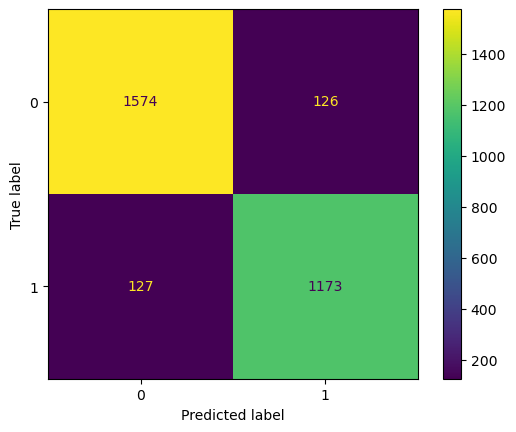

In [194]:
dt_cm_disp.plot()

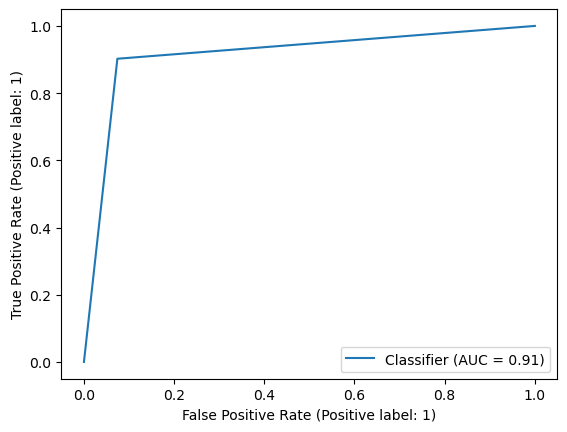

In [195]:
RocCurveDisplay.from_predictions(y_test, dt_preds)

In [204]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_preds)

0.9156666666666666

In [182]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [183]:
rf_preds = rf.predict(x_test)

In [184]:
rf_precision = precision_score(y_test, rf_preds)
rf_precision

0.9137254901960784

In [185]:
rf_recall = recall_score(y_test, rf_preds)
rf_recall

0.8961538461538462

In [197]:
rf_f1 = f1_score(y_test, rf_preds)
rf_f1

0.9048543689320389

In [198]:
rf_confusion_matrix = confusion_matrix(y_test, rf_preds)
rf_confusion_matrix

array([[1590,  110],
       [ 135, 1165]], dtype=int64)

In [199]:
rf_roc_auc_score = roc_auc_score(y_test, rf_preds)
rf_roc_auc_score

0.9157239819004525

In [200]:
rf_cm_disp = ConfusionMatrixDisplay(confusion_matrix = rf_confusion_matrix)

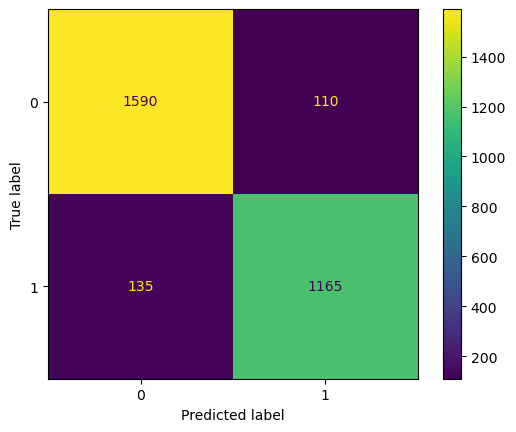

In [201]:
rf_cm_disp.plot()

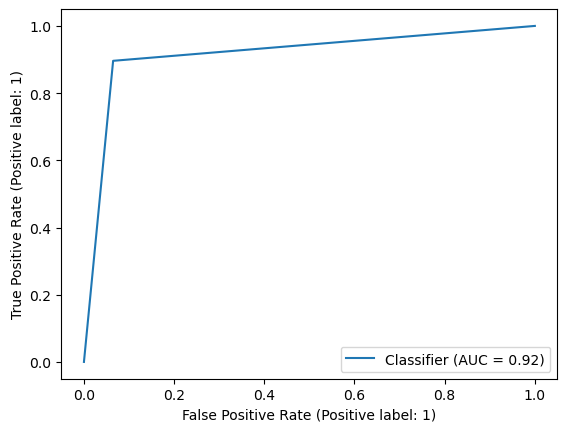

In [202]:
RocCurveDisplay.from_predictions(y_test, rf_preds)

In [215]:
accuracy_score(y_test, rf_preds)

0.9183333333333333

In [203]:
# Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [205]:
gnb_preds = gnb.predict(x_test)

In [206]:
gnb_precision = precision_score(y_test, gnb_preds)
gnb_precision

0.623779437105112

In [207]:
gnb_recall = recall_score(y_test, gnb_preds)
gnb_recall

0.8353846153846154

In [208]:
gnb_f1 = f1_score(y_test, gnb_preds)
gnb_f1

0.7142387372574811

In [209]:
gnb_confusion_matrix = confusion_matrix(y_test, gnb_preds)
gnb_confusion_matrix

array([[1045,  655],
       [ 214, 1086]], dtype=int64)

In [210]:
gnb_roc_auc_score = roc_auc_score(y_test, gnb_preds)
gnb_roc_auc_score

0.7250452488687783

In [211]:
gnb_cm_disp = ConfusionMatrixDisplay(confusion_matrix = gnb_confusion_matrix)

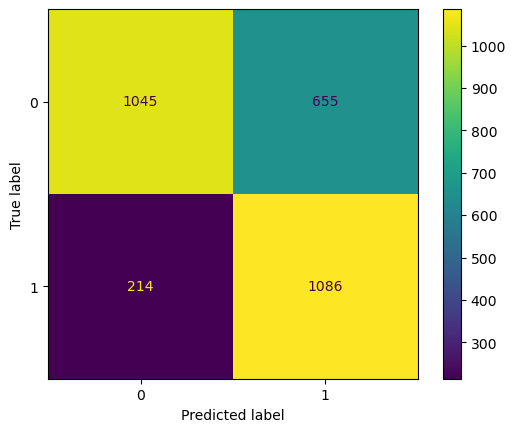

In [212]:
gnb_cm_disp.plot()

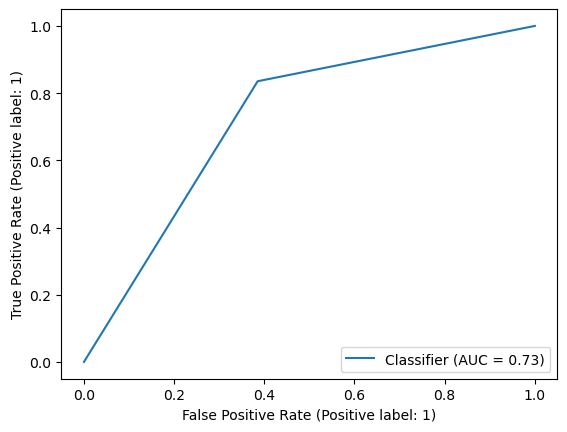

In [213]:
RocCurveDisplay.from_predictions(y_test, gnb_preds)

In [214]:
accuracy_score(y_test, gnb_preds)

0.7103333333333334

In [222]:
# K - NN

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train)
tr_xtrain = mm.transform(x_train)
tr_xtest = mm.transform(x_test)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(tr_xtrain, y_train)

KNeighborsClassifier()

In [226]:
knn_preds = knn.predict(tr_xtest)

In [227]:
knn_precision = precision_score(y_test, knn_preds)
knn_precision

0.9096045197740112

In [228]:
knn_recall = recall_score(y_test, knn_preds)
knn_recall

0.49538461538461537

In [229]:
knn_f1 = f1_score(y_test, knn_preds)
knn_f1

0.6414342629482072

In [230]:
knn_confusion_matrix = confusion_matrix(y_test, knn_preds)
knn_confusion_matrix

array([[1636,   64],
       [ 656,  644]], dtype=int64)

In [231]:
knn_roc_auc_score = roc_auc_score(y_test, knn_preds)
knn_roc_auc_score

0.728868778280543

In [232]:
knn_cm_disp = ConfusionMatrixDisplay(confusion_matrix = knn_confusion_matrix)

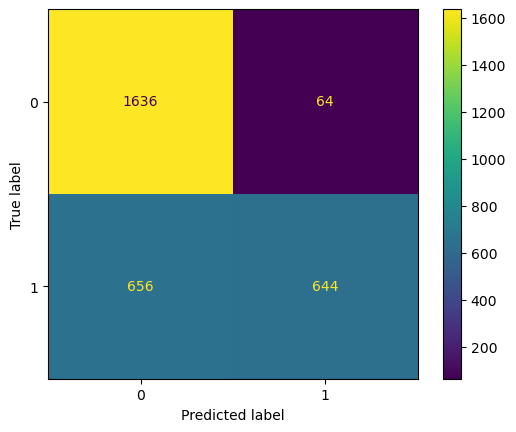

In [233]:
knn_cm_disp.plot()

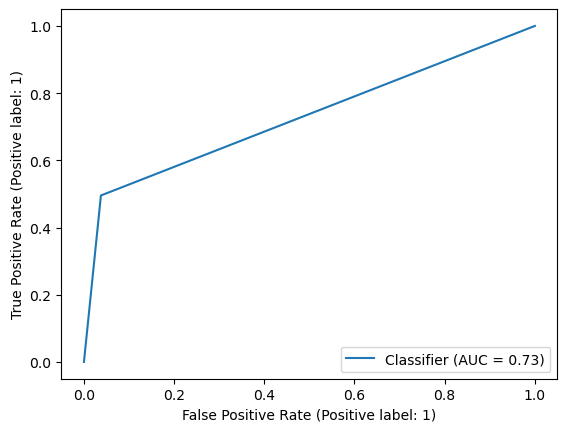

In [234]:
RocCurveDisplay.from_predictions(y_test, knn_preds)

In [235]:
accuracy_score(y_test, knn_preds)

0.76

In [236]:
# SVM

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train)
tr_xtrain = mm.transform(x_train)
tr_xtest = mm.transform(x_test)

from sklearn.svm import SVC
sv = SVC()
sv.fit(tr_xtrain, y_train)

SVC()

In [237]:
sv_preds = sv.predict(tr_xtest)

In [238]:
sv_precision = precision_score(y_test, sv_preds)
sv_precision

0.9245122985581001

In [239]:
sv_recall = recall_score(y_test, sv_preds)
sv_recall

0.8384615384615385

In [240]:
sv_f1 = f1_score(y_test, sv_preds)
sv_f1

0.8793868495361032

In [241]:
sv_confusion_matrix = confusion_matrix(y_test, sv_preds)
sv_confusion_matrix

array([[1611,   89],
       [ 210, 1090]], dtype=int64)

In [242]:
sv_roc_auc_score = roc_auc_score(y_test, sv_preds)
sv_roc_auc_score

0.893054298642534

In [243]:
sv_cm_disp = ConfusionMatrixDisplay(confusion_matrix = sv_confusion_matrix)

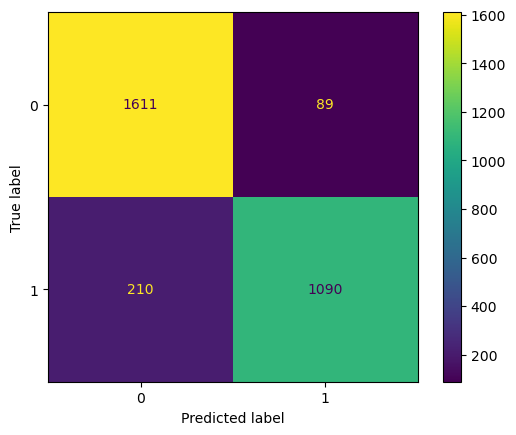

In [244]:
sv_cm_disp.plot()

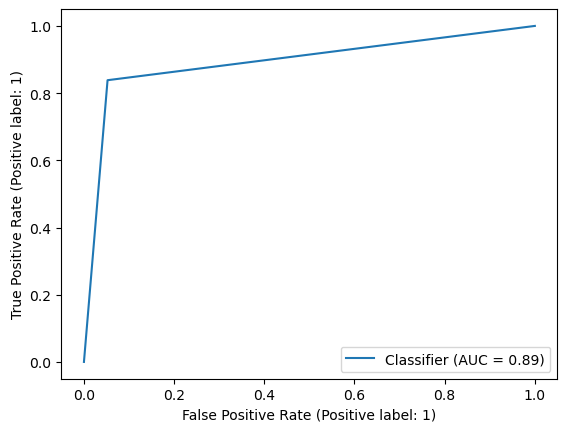

In [245]:
RocCurveDisplay.from_predictions(y_test, sv_preds)

In [246]:
accuracy_score(y_test, sv_preds)

0.9003333333333333